In [7]:
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime
from datetime import date
import seaborn as sns
import pandas as pd

In [5]:
df_master = pd.read_csv('data/spotify_personal_kaggle.csv', sep='\t')

In [11]:
# scatter plots for every combination of columns seperated by class y=0 and y=1
# output suppressed to save space but the most interesting plots are highlighted below

df_temp = df_master.drop(['artistName', 'trackName', 'mode', 'explicit'],axis=1)
df1 = df_temp[df_temp['y'] == 0]
df2 = df_temp[df_temp['y'] == 1]
columns = df1.columns[::-1]

#for i in range(len(columns)):
#    for j in range(len(columns)):
#        if i>j:
#            plt.scatter(df1[columns[i]], df1[columns[j]], s=7,c='blue', alpha=.2,label='y=o')
#            plt.scatter(df2[columns[i]], df2[columns[j]], s=7,c='red', alpha=.2,label='y=1')
#            plt.xlabel(columns[i])
#            plt.ylabel(columns[j])
#            plt.legend()
#            plt.title(f"{columns[i]} vs {columns[j]}")
#            plt.show()

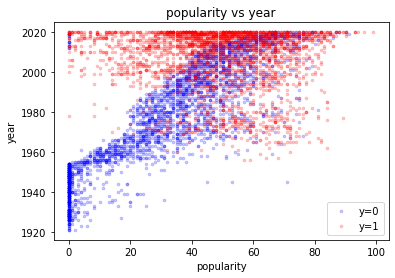

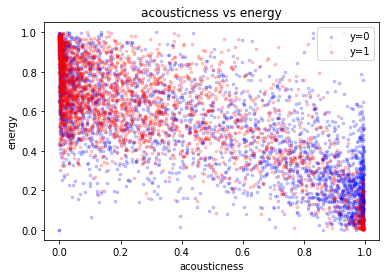

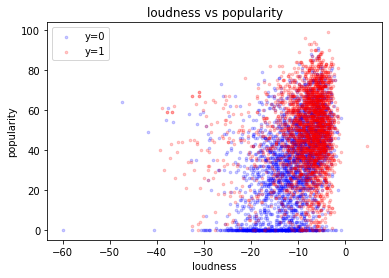

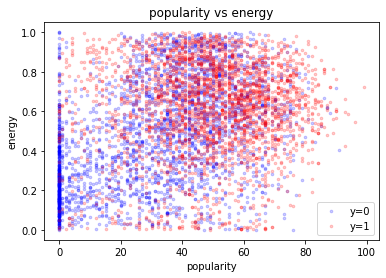

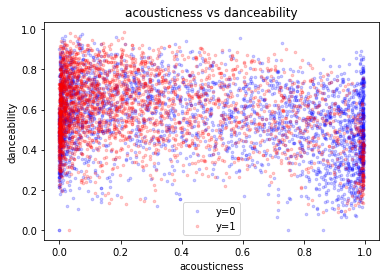

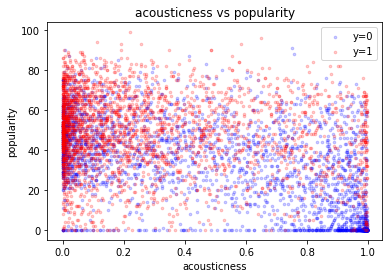

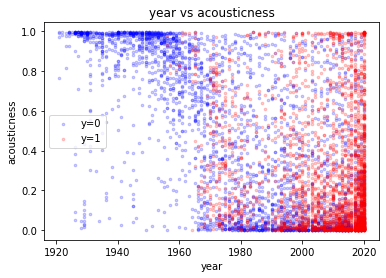

In [17]:
# selection of most interesting scatter plots from above

df_temp = df_master.drop(['artistName', 'trackName'], axis=1)
df1 = df_temp[df_temp['y'] == 0]
df2 = df_temp[df_temp['y'] == 1]
scatter_columns = [('year', 'popularity'), ('energy', 'acousticness'), ('popularity', 'loudness'), ('energy', 'popularity'), ('danceability', 'acousticness'), ('popularity', 'acousticness'), ('acousticness', 'year')]
for column2, column1 in scatter_columns:
    plt.scatter(df1[column1], df1[column2], s=7,c='blue', alpha=.2,label='y=0')
    plt.scatter(df2[column1], df2[column2], s=7,c='red', alpha=.2,label='y=1')
    plt.xlabel(column1)
    plt.ylabel(column2)
    plt.legend()
    plt.title(f"{column1} vs {column2}")
    plt.savefig(f"figs/{column1}vs{column2}.png", bbox_inches='tight', dpi=600)
    plt.show()

In [64]:
#similar scatter plots as above but filtering out outliers for duration_ms
#output suppressed to save space

df_temp = df_master.drop(['artistName', 'trackName'], axis=1)
df_temp = df_temp[df_temp['duration_ms'] < 5e5]
df1 = df_temp[df_temp['y'] == 0]
df2 = df_temp[df_temp['y'] == 1]
categories = df_temp['y'].unique()
column1 = 'duration_ms'
#for column2 in df_temp.columns:
#    plt.scatter(df1[column1], df1[column2], s=7,c='blue', alpha=.2, label='y=0')
#    plt.scatter(df2[column1], df2[column2], s=7,c='red', alpha=.2, label='y=1')
#    plt.legend()
#    plt.xlabel(column1)
#    plt.ylabel(column2)
#    plt.title(f"{column1} vs {column2}")
#    plt.show()

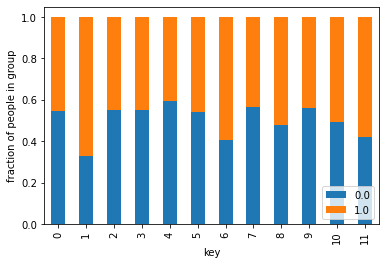

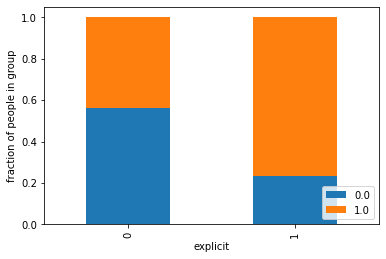

In [18]:
# Songs in Db are more likely to be from my personal listening history as well as songs labeled as explicit
count_matrix = df_master.groupby(['key', 'y']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.savefig("key-barplot.png", bbox_inches='tight', dpi=600)
plt.show()

count_matrix = df_master.groupby(['explicit', 'y']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('figs/fraction of people in group')
plt.legend(loc=4)
plt.savefig("figs/explicit-barplot.png", bbox_inches='tight', dpi=600)
plt.show()

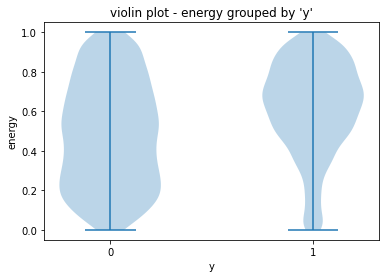

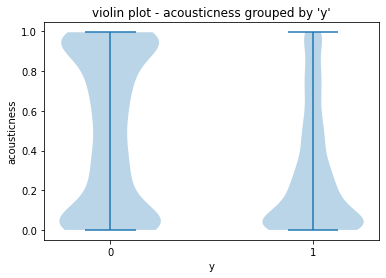

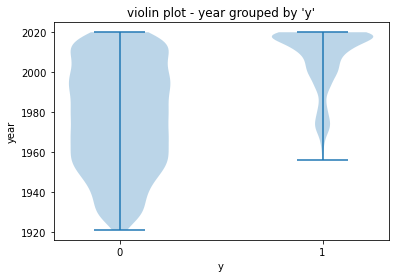

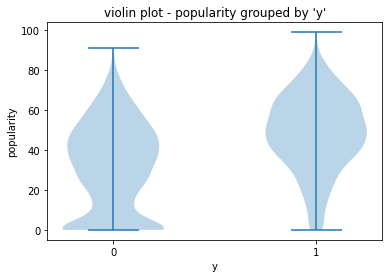

In [20]:
#some noteworthy findings are a preference for higher energy songs and low accousticness
cat_feat = ['y']
cont_feat = ['energy', 'acousticness', 'year', 'popularity']
for cat in cat_feat:
    for cont in cont_feat:
        dataset = [df_master[df_master[cat]== 0][cont].values,
               df_master[df_master[cat]== 1][cont].values]

        plt.violinplot(dataset = dataset)
        plt.xticks([1,2],[0, 1])
        plt.ylabel(cont)
        plt.xlabel('y')
        plt.title(f"violin plot - {cont} grouped by 'y'")
        plt.savefig(f"figs/{cont}-violin.png", bbox_inches='tight', dpi=600)
        plt.show()

In [68]:
# output supressed to save space- noteworthy plots from this cell are recreated in the next cell below
df_hist = df_master.drop(['artistName', 'trackName'], axis=1)
categories = df_hist['y'].unique()
#for column in df_hist.columns:
#    bin_range = (df_hist[column].min(),df_hist[column].max())

#    for c in categories:
#        plt.hist(df_hist[df_hist['y']==c][column],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
#    plt.legend()
#    plt.ylabel('counts')
#    plt.xlabel(column)
#    plt.show()

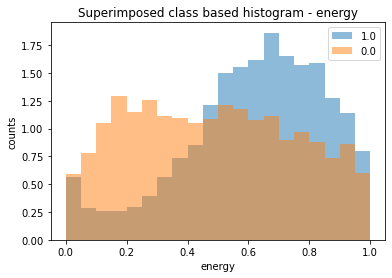

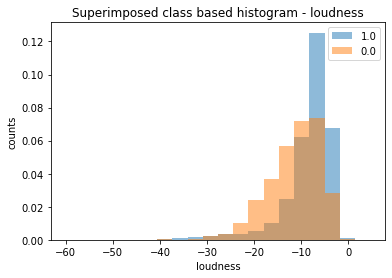

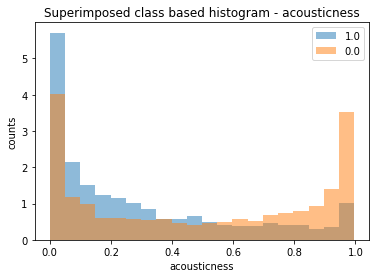

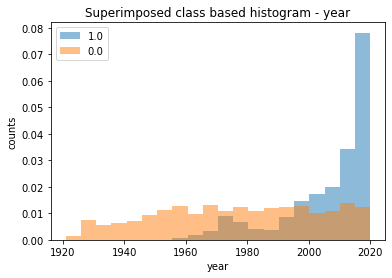

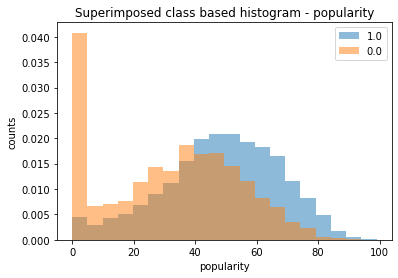

In [21]:
# histograms for class y=0 and y=1 superimposed 
# selection of 5 most important continuous columns with respect to seperability
df_hist = df_master.drop(['artistName', 'trackName'], axis=1)
categories = df_hist['y'].unique()
for column in ['energy', 'loudness', 'acousticness', 'year', 'popularity']:
    bin_range = (df_hist[column].min(),df_hist[column].max())

    for c in categories:
        plt.hist(df_hist[df_hist['y']==c][column],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
    plt.legend()
    plt.ylabel('counts')
    plt.xlabel(column)
    plt.title(f"Superimposed class based histogram - {column}")
    plt.savefig(f"figs/{column}-hist.png", bbox_inches='tight', dpi=600)
    plt.show()

In [59]:
# output supressed to save space- noteworthy plots from this cell are recreated in the next cell
df_temp = df_master.drop(['artistName', 'trackName'], axis=1)
df1 = df_temp[df_temp['y'] == 0]
df2 = df_temp[df_temp['y'] == 1]
for column in df_temp.columns:
    if column == 'y':
        continue
    if column == 'year':
        continue
#    plt.plot(sorted(df1['year'].unique()), df1.groupby('year')[column].agg('mean'),c='blue',label='y=0')
#    plt.plot(sorted(df2['year'].unique()), df2.groupby('year')[column].agg('mean'),c='red',label='y=1')
#    plt.xlabel('year')
#    plt.ylabel(column)
#    plt.legend()
#    plt.show();

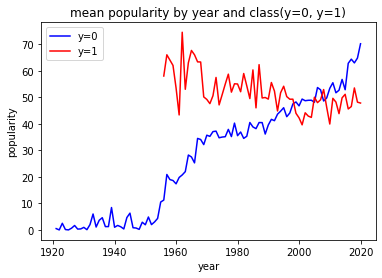

In [22]:
# The only column that had significant seperation between y=0 and y=1 for the expected 
# value given a particular year was 'popularity'
df_temp = df_master.drop(['artistName', 'trackName'], axis=1)
df1 = df_temp[df_temp['y'] == 0]
df2 = df_temp[df_temp['y'] == 1]
for column in ['popularity']:
    if column == 'y':
        continue
    if column == 'year':
        continue
    plt.plot(sorted(df1['year'].unique()), df1.groupby('year')[column].agg('mean'),c='blue',label='y=0')
    plt.plot(sorted(df2['year'].unique()), df2.groupby('year')[column].agg('mean'),c='red',label='y=1')
    plt.xlabel('year')
    plt.ylabel(column)
    plt.title('mean popularity by year and class(y=0, y=1)')
    plt.legend()
    plt.savefig(f"figs/year-vs-avg-pop.png", bbox_inches='tight', dpi=600)
    plt.show()

In [24]:
corr = df_master.corr()

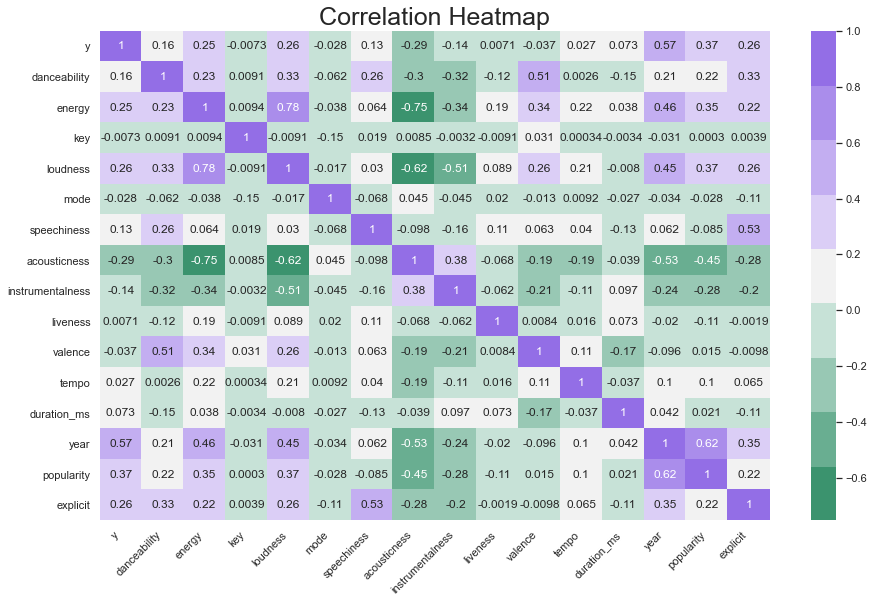

In [41]:
sns.set(rc={'figure.figsize':(15,9)})
cmap = sns.diverging_palette(150, 275, s=80, l=55, n=9)
ax = sns.heatmap(corr,cmap=cmap, annot=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.title('Correlation Heatmap',size= 25)

plt.savefig(f"figs/corr-heatmap.png", bbox_inches='tight', dpi=600)

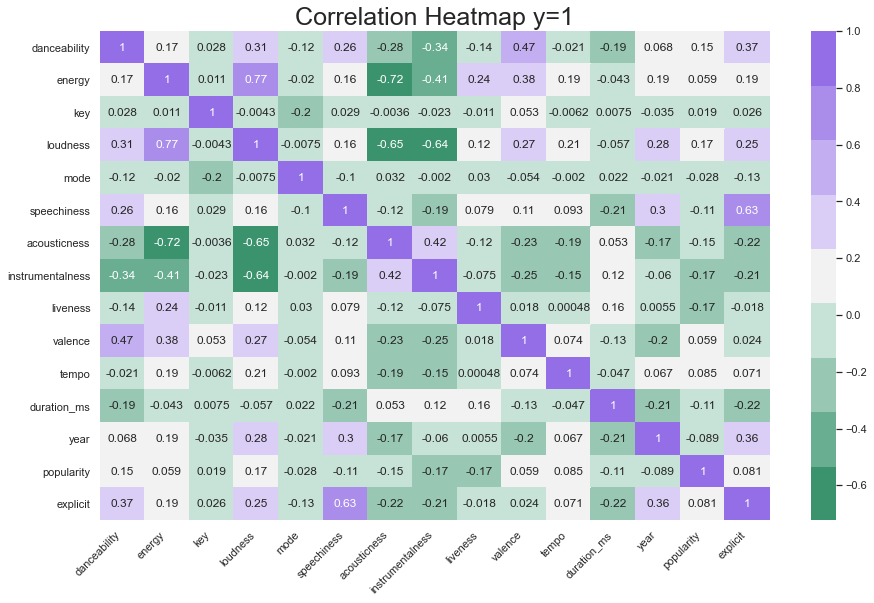

In [42]:
corr_personal = df_master[df_master['y'] == 1].drop('y', axis = 1).corr()
sns.set(rc={'figure.figsize':(15,9)})
cmap = sns.diverging_palette(150, 275, s=80, l=55, n=9)
ax = sns.heatmap(corr_personal,cmap=cmap, annot=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.title('Correlation Heatmap y=1',size= 25)

plt.savefig(f"figs/corr-heatmap-y=1.png", bbox_inches='tight', dpi=600)

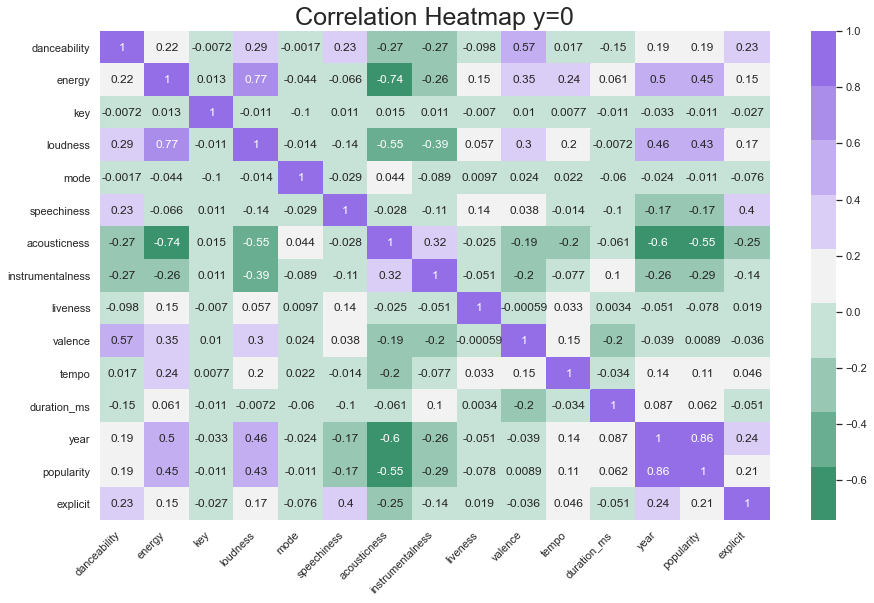

In [43]:
corr_kaggle = df_master[df_master['y'] == 0].drop('y', axis = 1).corr()

sns.set(rc={'figure.figsize':(15,9)})
cmap = sns.diverging_palette(150, 275, s=80, l=55, n=9)
ax = sns.heatmap(corr_kaggle,cmap=cmap, annot=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.title('Correlation Heatmap y=0',size= 25)

plt.savefig(f"figs/corr-heatmap-y=0.png", bbox_inches='tight', dpi=600)